# Partical Work 04 - Linear Regression
Author: *Romain Claret*

## Exerice 1 - Get the data

/anaconda3/envs/MachLe/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


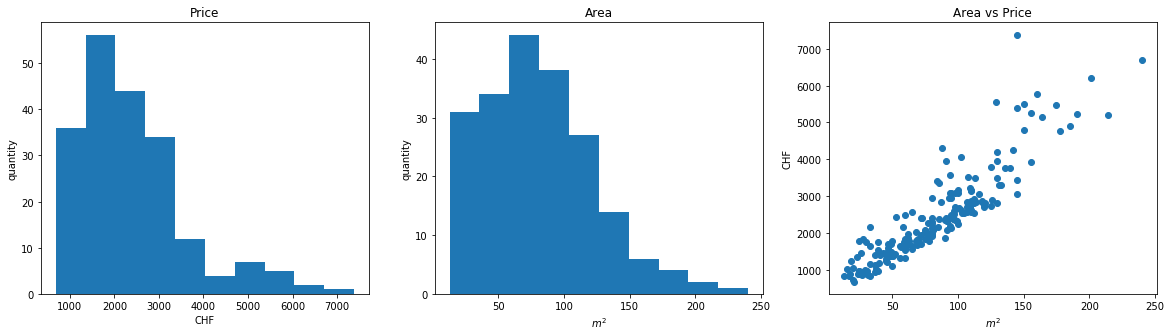

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_excel('lausanne-appart.xlsx',
                        usecols=[0, 2],
                        header=0,
                        names=['area', 'rent']
                       )

data_rent = dataset['rent'].values
data_area = dataset['area'].values

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axe_1, axe_2, axe_3 = axes.flatten()

axe_1.hist(data_rent)
axe_1.set_title("Price")
axe_1.set_xlabel('CHF')
axe_1.set_ylabel('quantity')

axe_2.hist(data_area)
axe_2.set_title("Area")
axe_2.set_xlabel('$m^2$')
axe_2.set_ylabel('quantity')

axe_3.scatter(data_area, data_rent)
axe_3.set_title("Area vs Price")
axe_3.set_xlabel('$m^2$')
axe_3.set_ylabel('CHF')

fig.show()

## Exercice 2

a)

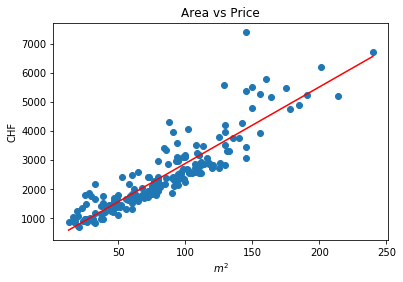

In [2]:
import numpy as np

def get_theta(X, y):
    return (np.linalg.inv(X.T * X) * X.T).dot(y)

X = np.matrix([np.ones(len(data_area)), data_area]).T

theta = get_theta(X,data_rent).A[0]

h_func = np.poly1d(np.roll(theta, 1))

x_predict = np.linspace(np.min(data_area), np.max(data_area))
y_predict = h_func(x_predict)

plt.scatter(data_area, data_rent)
plt.title("Area vs Price")
plt.xlabel('$m^2$')
plt.ylabel('CHF')
plt.plot(x_predict, y_predict, color="red")
plt.show()

b)

In [3]:
def get_compute_cost(h,x,y):
    return sum(np.square((h(x[i]) - y[i])) for i in range(len(x))) / (2 * len(x))

print("Cost is: ", get_compute_cost(h_func,data_area,data_rent))

Cost is:  138034.95779787409


## Exerice 3 - Batch gradient descent for linear regression

In [4]:
import copy as cp
import time



alpha = .1e-6
delta = .1e-9

theta = np.zeros(2)
theta_previous = np.full((2),1e+308)
costs = []
total_time = 0

start = time.time()
while ((abs(theta_previous[0] - theta[0]) > delta) and
       (abs(theta_previous[1] - theta[1]) > delta)):    
    theta_previous = cp.copy(theta)
    theta -= alpha / len(X) * np.sum((np.matmul(X, theta) - data_rent) * X)
    
    cost = get_compute_cost(np.poly1d(np.roll(theta, 1)),data_area,data_rent)
    costs.append(cost)

end = time.time()
total_time = end-start

a) It stabilizes fast, no need for a lot of iterations

[28.38924185 28.38924185]


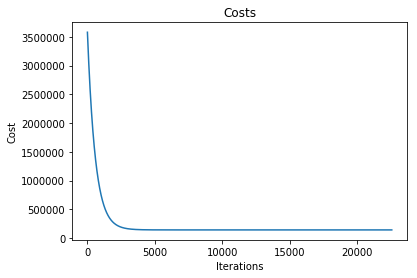

In [5]:
print(theta)
plt.title("Costs")
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

b) It's using a delta between current and previous theta

c) 

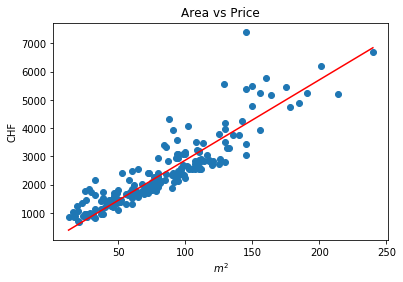

In [6]:
h_func_batch = np.poly1d(np.roll(theta, 1))
y_predict_batch = h_func_batch(x_predict)

plt.scatter(data_area, data_rent)
plt.title("Area vs Price")
plt.xlabel('$m^2$')
plt.ylabel('CHF')
plt.plot(x_predict, y_predict_batch, color="red")
plt.show()

d) Both costs are similar.

In [7]:
print("Time elapsed:", total_time)
print("Cost is:", get_compute_cost(h_func_batch,data_area,data_rent))
print("Cost different with exercice 2:", get_compute_cost(h_func,data_area,data_rent)-get_compute_cost(h_func_batch,data_area,data_rent))

Time elapsed: 68.67997074127197
Cost is: 142809.62280150174
Cost different with exercice 2: -4774.665003627655


## Exerice 4 - Stochastic gradient descent for linear regression

In [8]:
import random as rd

alpha = .1e-6
delta = .1e-9

theta = np.zeros(2)
theta_previous = np.full((2),1e+308)
costs = []
count = 0
total_time = 0

start = time.time()
while ((abs(theta_previous[0] - theta[0]) > delta) and
       (abs(theta_previous[1] - theta[1]) > delta)):
    theta_previous = cp.copy(theta)
    idx = rd.randint(0, len(X)-1)
    t_0 = np.matmul(X[idx], theta)
    t_1 = t_0 - data_rent[idx]
    t_2 = t_1 * X[idx] 
    t_3 = alpha * t_2
    theta = np.subtract(theta,t_3).A[0]
    count += 1
end = time.time()
total_time = end-start

a)

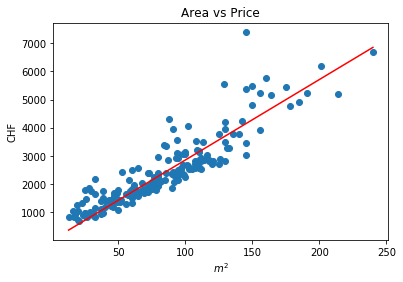

In [9]:
h_func_stoch = np.poly1d(np.roll(theta, 1))
y_predict_stoch = h_func_stoch(x_predict)

plt.scatter(data_area, data_rent)
plt.title("Area vs Price")
plt.xlabel('$m^2$')
plt.ylabel('CHF')
plt.plot(x_predict, y_predict_stoch, color="red")
plt.show()

b)

In [10]:
print("Iterations to reach convergence:", count)

Iterations to reach convergence: 586066


c) It's using a delta between current and previous theta

d) Both costs are similar. However, we can note that the time performance is much better with the stochastic approach.

In [11]:
print("Time elapsed:", total_time)
print("Cost is:", get_compute_cost(h_func_stoch,data_area,data_rent))
print("Cost different with exercice 2:", get_compute_cost(h_func,data_area,data_rent)-get_compute_cost(h_func_stoch,data_area,data_rent))

Time elapsed: 21.629117250442505
Cost is: 144042.88417393022
Cost different with exercice 2: -6007.92637605613
